# 中文文本自动化标签方法研究

导入scikit-learn库中的文本预处理类

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.manifold import TSNE

导入分词工具

In [2]:
import jieba

导入scikit-learn库中的聚类算法

In [3]:
from sklearn.cluster import KMeans

导入其它库

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import sys
import time
import random
from collections import Counter

获取文本以及文本标签

In [5]:
data_path = r'D:\textClassify\THUCNews'
topic_list = ['财经', '彩票', '房产', '股票', '家居', '教育', '科技', '社会', '时尚', '时政', '体育', '星座', '游戏', '娱乐']
corpus = []
true_labels = []

for i, topic in enumerate(topic_list):
    topic_dir = os.path.join(data_path, topic)
    filenames = os.listdir(topic_dir)[:-1]
    random.shuffle(filenames)
    for file in filenames[:1000]:
        corpus.append(open(os.path.join(topic_dir, file), encoding='utf-8').read())
        true_labels.append(i)

## 方案1：使用jieba分词，使用1-gram作为特征，然后计算tfidf权重

In [6]:
features = []
for text in corpus:
    features.append(' '.join(jieba.lcut(text)))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\min\AppData\Local\Temp\jieba.cache
Loading model cost 0.554 seconds.
Prefix dict has been built succesfully.


分词结果示例

In [7]:
index = random.sample(range(len(corpus)), 1)[0]
print('原文本：' + corpus[index])
print('分词后：' + features[index].replace(' ', '/'))

原文本：主持人在广州豪华别墅拆迁现场做裸体俯卧撑
　　文/图 记者全杰
　　昨日，二沙岛拆违行动再度升级，出动了15米臂长的大型勾机强拆宏达径26号；同时，继续动用8米臂长勾机和风炮分别强拆宏达径12号和3号。城管部门表示，周六、周日两天城管队员和清拆工人都不会休息，争取尽快将违建清拆完毕。按照目前进度，宏达径26号违建别墅最快能在3天内夷为平地，宏达径12号也最快能在3天内完成强拆。
　　昨日上午，由于目前使用的8米臂长勾机的勾臂长度不够，不能伸到别墅高处将违建部分拆除，城管部门增调了一台臂长达到15米的大型勾机到场继续强拆。
　　记者看到，经过两日的强拆，宏达径26号违建别墅面向小区的墙体已经全部拆除，别墅内部2层和3层楼板和隔墙也已支离破碎，别墅中部被拆出了一个大凹洞，大量钢筋和钢材悬露在外。
　　13时30分，15米臂长大型勾机抵达强拆现场，8米臂长勾机退场。别墅高处部分很快就拆除了一大块。
　　城管部门负责人表示，按照目前进度，宏达径26号违建最快将在3天内能夷为平地，“强拆力度只会加强不会减弱，城管队员和清拆工人双休日也不放假，并且24小时值班，一直将违建别墅拆除完毕为止。”
　　宏达径3号迎来两支风炮机
　　在宏达径12号违建别墅，强拆行动也继续进行，城管部门继续动用一台8米臂长的勾机对别墅违建部分进行强拆，进度也有所加快，别墅停车库上加建的一层违建部分已经基本拆完，另外西面的扩建部分也拆除了前半部分，剩下的后半部分由于勾机不能进入，将采取人工方式强拆。由于该别墅用料充足，地板墙体厚度达到50厘米，人工强拆有一定难度，城管部门负责人预计进度会因此受到拖延，但将争取3天内完成强拆。别墅业主梅某连续3天都在强拆现场守候，其态度温和平静，对于城管强拆工作非常配合。
　　另外在宏达径3号违建别墅，城管部门派出了8名强拆工人和两支风炮机进场强拆，同时别墅业主方也有三四名工人在用铁锤自拆。
　　多栋别墅相继开始自拆
　　记者观察到，宏达径1号、8号、22号、24号以及宏兴径17号、宏业径9号等违建别墅也相继开始了自拆，进度也有所加快。宏达径1号现场派出了11名工人和两支风炮自拆，业主代表全程督工。
　　不过，宏城花园在掀起强拆和自拆高潮的同时，其造成的巨大噪音也引起其他业主强烈不满，物管公司收到大量业主投诉，均要求在周六周日要停止清拆。宏兴径17号违建别墅由于邻居

In [8]:
vectorizer = CountVectorizer(max_features=10000)
print(vectorizer)
X = vectorizer.fit_transform(features)
X

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


<14000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 1867000 stored elements in Compressed Sparse Row format>

词频排序前10000的词组

In [9]:
','.join(vectorizer.get_feature_names())

'00,000,01,010,012,02,03,04,05,06,07,08,09,10,100,1000,10000,101,102,103,104,105,106,107,108,1080p,109,11,110,1100,1109,112,113,114,115,117,119,12,120,1200,122,123,125,126,128,13,130,1300,135,138,14,140,1400,15,150,1500,15000,16,160,1600,17,170,1700,18,180,1800,19,190,198,1990,1992,1993,1994,1995,1996,1997,1998,1999,20,200,2000,20000,2001,2002,2003,2004,2005,2006,2007,2008,2009,201,2010,2011,2012,2013,2014,2015,2020,21,210,211,22,220,23,230,2300,24,240,2400,25,250,2500,26,260,27,270,2700,28,2800,29,2d,2g,30,300,3000,31,310,32,320,3200,33,34,35,350,3500,36,360,37,38,380,39,3d,3ds,3g,40,400,4000,41,42,43,44,442,45,450,46,47,48,480,49,50,500,5000,51,52,53,54,55,56,57,58,59,60,600,6000,61,62,63,64,65,66,67,68,69,70,700,7000,71,72,720p,73,74,75,750,76,77,78,79,80,800,8000,81,82,83,84,85,86,87,88,89,90,900,9000,91,92,93,94,95,96,97,98,99,ac,aig,and,android,aps,at,a股,b2c,be,bet365,blog,boss,bwin,b股,cba,cbd,ccd,ceo,chanel,chinajoy,cmos,cn,com,count,cpi,d90,dc,diy,dota,dvd,e3,ea,edu,eos,etf,f1,

In [10]:
transformer = TfidfTransformer()
print(transformer)
tfidf = transformer.fit_transform(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


运行K-Means聚类算法

In [11]:
start = time.time()
model = KMeans(n_clusters=14).fit(tfidf)
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：531.2477977275848s


通过贪心方法选择各cluster对应的实际类别：

In [12]:
def greedy_select(model, n_label):
    counts = []
    for i in range(n_label):
        count = Counter(model.labels_[i*1000:(i+1)*1000])
        print('第%2d类：'%(i), end='')
        print(count)
        counts.append(count)
        
    already_allocated = {}
    n_correct = 0
    while len(already_allocated.keys()) < n_label:
        most_commons = []
        for count in counts:
            if count:
                most_commons.append(count.most_common(1)[0])
            else:
                most_commons.append((None, 0))
        freq = np.array([ele[1] for ele in most_commons])
        true_label = freq.argmax()
        most_common = most_commons[true_label]
        if most_common[0] not in already_allocated and true_label not in already_allocated.values():
            already_allocated[most_common[0]] = true_label
            n_correct += most_common[1]
        try:
            counts[true_label].pop(most_common[0])
        except:
            break

    print('算法计算结果（聚类结果-实际类别）')
    for key in already_allocated.keys():
        print('%2d-%2d'%(key, already_allocated[key]))
    print('聚类正确率为：' + str(n_correct/len(corpus)))

In [13]:
greedy_select(model, len(topic_list))

第 0类：Counter({13: 420, 3: 412, 4: 160, 6: 7, 11: 1})
第 1类：Counter({1: 356, 8: 284, 12: 138, 7: 110, 4: 85, 6: 20, 11: 4, 9: 3})
第 2类：Counter({5: 504, 4: 326, 13: 134, 11: 26, 6: 9, 0: 1})
第 3类：Counter({13: 568, 4: 415, 3: 10, 11: 4, 6: 2, 9: 1})
第 4类：Counter({4: 795, 0: 126, 11: 52, 13: 23, 6: 2, 7: 1, 9: 1})
第 5类：Counter({10: 685, 4: 221, 11: 71, 6: 21, 3: 1, 2: 1})
第 6类：Counter({4: 521, 0: 383, 9: 30, 13: 26, 11: 16, 6: 15, 3: 5, 10: 2, 7: 2})
第 7类：Counter({6: 809, 4: 151, 11: 17, 10: 11, 1: 4, 7: 3, 9: 2, 3: 1, 13: 1, 0: 1})
第 8类：Counter({4: 556, 0: 390, 11: 47, 6: 7})
第 9类：Counter({4: 809, 6: 170, 13: 13, 10: 3, 11: 3, 7: 2})
第10类：Counter({7: 807, 4: 162, 11: 14, 6: 12, 8: 3, 12: 1, 10: 1})
第11类：Counter({11: 581, 2: 348, 4: 63, 6: 4, 0: 4})
第12类：Counter({9: 713, 4: 229, 11: 25, 7: 19, 0: 7, 6: 6, 13: 1})
第13类：Counter({4: 801, 11: 110, 6: 64, 0: 11, 7: 7, 9: 4, 10: 3})
算法计算结果（聚类结果-实际类别）
 6- 7
 4- 9
 7-10
 9-12
10- 5
11-11
13- 3
 5- 2
 3- 0
 0- 8
 1- 1
聚类正确率为：0.47385714285714287


## 方案2：不使用分词，以字为特征单位

In [14]:
vectorizer = CountVectorizer(analyzer='char')
print(vectorizer)
X = vectorizer.fit_transform(corpus)
X

CountVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


<14000x5589 sparse matrix of type '<class 'numpy.int64'>'
	with 3871436 stored elements in Compressed Sparse Row format>

所有特征单元

In [15]:
','.join(vectorizer.get_feature_names())

'\t,\n, ,!,",#,$,%,&,\',(,),*,+,,,-,.,/,0,1,2,3,4,5,6,7,8,9,:,;,<,=,>,?,@,[,\\,],^,_,`,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,{,|,},~,\x9f,\xa0,¥,\xad,®,°,±,²,·,×,à,á,æ,è,é,ê,í,î,ï,ò,÷,ø,ù,ü,ā,ē,ī,ı,ō,ş,ǐ,ǒ,ˇ,α,β,ε,μ,ο,σ,υ,φ,ω,ф,ё,—,―,‘,’,“,”,•,…,‧,″,※,€,℃,№,™,ⅰ,ⅱ,ⅲ,ⅳ,↑,→,↓,∥,∩,∶,∽,≈,≌,≠,≤,⊙,⋯,①,②,③,④,⑤,⑥,⑦,⑧,⑨,⑴,⑵,⑶,⑷,⒁,⒈,⒖,─,┅,┍,■,□,▲,△,▶,◆,◇,○,◎,●,★,☆,\u3000,、,。,〈,〉,《,》,「,」,【,】,〔,〕,〖,〗,〜,あ,う,お,か,が,き,く,ぐ,さ,し,ず,た,ち,っ,て,と,ど,ね,の,は,ば,ひ,ぷ,ぽ,ま,み,め,も,や,よ,ら,り,れ,ん,ァ,ア,ィ,イ,ウ,ェ,エ,ォ,オ,カ,ガ,キ,ク,グ,ケ,ゲ,コ,ゴ,シ,ジ,ス,セ,ゼ,ゾ,タ,ダ,チ,ッ,テ,デ,ト,ド,ナ,ニ,ハ,バ,ビ,ピ,ブ,プ,ベ,ホ,ポ,マ,ミ,ム,メ,モ,ャ,ヤ,ュ,ョ,ラ,リ,ル,レ,ロ,ワ,ン,ヴ,ヶ,・,ㄔ,ㄖ,㈠,㈡,㈢,一,丁,七,万,丈,三,上,下,不,与,丐,丑,专,且,丕,世,丘,丙,业,丛,东,丝,丞,丢,两,严,丧,丨,个,丫,中,丰,串,临,丶,丸,丹,为,主,丽,举,丿,乃,久,么,义,之,乌,乍,乎,乏,乐,乒,乓,乔,乖,乘,乙,九,乞,也,习,乡,书,买,乱,乳,乾,了,予,争,事,二,于,亏,云,互,五,井,亘,亚,些,亟,亡,亢,交,亥,亦,产,亨,亩,享,京,亭,亮,亲,亳,亵,人,亿,什,仁,仃,仄,仅,仆,仇,今,介,仍,从,仑,仓,仔,仕,他,仗,付,仙,仝,仟,代,令,以,仨,仪,们,仰,仲,件,价,任,份,仿,企,伉,伊,伍,伎,伏,伐,休,众,优,伙,会,伞,伟,传,伢,伤,伦,伪,伫,伯,估,伴,伶,伸,伺,似,伽,佃,但,位,低,住,佐,佑,体,何,佗,佘,余,佚,佛,作,佟,你,佣,佩,佬,佯,佰,佳,佻,佼,使,侃,侄,侈,例,侍,侏,侑,侗

In [16]:
transformer = TfidfTransformer()
print(transformer)
tfidf = transformer.fit_transform(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


In [17]:
start = time.time()
model = KMeans(n_clusters=14).fit(tfidf)
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：1180.5558414459229s


In [18]:
greedy_select(model, len(topic_list))

第 0类：Counter({1: 390, 9: 280, 3: 248, 5: 56, 7: 12, 0: 10, 12: 3, 2: 1})
第 1类：Counter({4: 514, 13: 398, 7: 25, 5: 22, 0: 14, 3: 9, 9: 9, 12: 6, 8: 3})
第 2类：Counter({10: 522, 3: 312, 5: 44, 7: 43, 9: 35, 0: 33, 12: 4, 2: 2, 1: 2, 13: 1, 8: 1, 6: 1})
第 3类：Counter({9: 564, 3: 236, 5: 93, 12: 74, 0: 14, 7: 11, 1: 7, 6: 1})
第 4类：Counter({0: 489, 3: 345, 7: 72, 5: 53, 12: 20, 9: 10, 8: 5, 4: 4, 6: 2})
第 5类：Counter({2: 716, 7: 153, 5: 45, 12: 45, 0: 15, 3: 11, 9: 9, 11: 3, 1: 1, 6: 1, 10: 1})
第 6类：Counter({8: 349, 3: 171, 12: 146, 5: 144, 7: 67, 9: 40, 0: 34, 6: 34, 2: 10, 1: 3, 13: 2})
第 7类：Counter({5: 660, 7: 250, 2: 31, 0: 28, 3: 17, 9: 4, 4: 4, 6: 2, 13: 2, 12: 2})
第 8类：Counter({0: 737, 12: 119, 7: 108, 5: 19, 3: 8, 9: 4, 8: 3, 10: 1, 6: 1})
第 9类：Counter({5: 848, 3: 73, 7: 29, 0: 20, 2: 10, 9: 9, 12: 8, 6: 3})
第10类：Counter({13: 746, 7: 120, 5: 99, 12: 20, 0: 10, 3: 3, 4: 2})
第11类：Counter({7: 459, 11: 354, 0: 180, 5: 4, 12: 2, 3: 1})
第12类：Counter({6: 589, 12: 228, 7: 70, 0: 56, 5: 22, 3: 1

## 方案3：还是以字为特征单位，同时加入bigram特征

In [19]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1,2), max_features=10000)
print(vectorizer)
X = vectorizer.fit_transform(corpus)
X

CountVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


<14000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 7554821 stored elements in Compressed Sparse Row format>

In [20]:
','.join(vectorizer.get_feature_names())

'\n,\n我,\n欢, , (, -, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, >, ?, [, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, r, s, t, v, w, “, ■, ●, 《, 【, 一, 三, 上, 下, 不, 与, 专, 业, 东, 两, 中, 为, 主, 事, 二, 五, 人, 今, 从, 他, 以, 但, 作, 你, 全, 公, 关, 其, 分, 刘, 前, 北, 华, 南, 去, 双, 发, 另, 可, 同, 吴, 周, 和, 四, 因, 国, 图, 在, 地, 基, 多, 大, 天, 女, 如, 学, 实, 家, 对, 导, 小, 尽, 巨, 巴, 市, 年, 广, 开, 张, 当, 总, 成, 我, 截, 户, 报, 据, 推, 文, 新, 日, 时, 昨, 更, 最, 有, 本, 李, 杨, 样, 根, 欧, 此, 每, 比, 水, 法, 活, 游, 点, 然, 爱, 特, 独, 王, 现, 由, 白, 目, 相, 看, 第, 红, 约, 经, 编, 网, 美, 考, 而, 联, 自, 英, 蓝, 虽, 西, 记, 该, 近, 这, 通, 那, 重, 金, 阿, 陈, 除, 随, 首, 马, 高, 魔, 黄,",%,% ,%、,%。,%以,%和,%左,%的,%至,%，,%；,&,(,(0,(1,(2,(3,(4,(6,(a,(b,(c,(h,(m,(p,(s,(含,(图,(微,(本,(组,(编,(记,(论,),) ,)(,)、,)。,)》,)和,)在,)的,)，,)：,)；,*,**,+,+1,,,, ,,0,-,- ,--,-0,-1,-2,-3,-4,-5,-6,-8,-9,-h,.,. ,.0,.1,.2,.3,.4,.5,.6,.7,.8,.9,.c,.h,.s,/,//,/0,/1,/2,/3,/半,/吨,/平,/文,0,0 ,0%,0),0-,0.,0/,00,01,02,03,04,05,06,07,08,09,0m,0p,0、,0。,0万,0个,0人,0亿,0余,0倍,0元,0公,0分,0名,0后,0多,0天,0家,0岁,0平,0年,0指,0日,0月,0期,0比,0注,0点,0的,0米,0美,0路,0，,1,1 ,1%,1),1,,1-,1.,

In [21]:
transformer = TfidfTransformer()
print(transformer)
tfidf = transformer.fit_transform(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


In [22]:
start = time.time()
model = KMeans(n_clusters=14).fit(tfidf)
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：2108.4760916233063s


In [23]:
greedy_select(model, len(topic_list))

第 0类：Counter({3: 420, 9: 397, 8: 101, 7: 64, 1: 14, 4: 3, 13: 1})
第 1类：Counter({2: 518, 11: 396, 7: 38, 1: 26, 8: 9, 12: 6, 4: 6, 3: 1})
第 2类：Counter({10: 511, 8: 340, 3: 53, 7: 45, 1: 36, 5: 8, 4: 4, 13: 1, 11: 1, 12: 1})
第 3类：Counter({3: 703, 7: 126, 8: 77, 4: 69, 1: 18, 9: 5, 6: 1, 12: 1})
第 4类：Counter({5: 424, 8: 417, 7: 62, 1: 50, 4: 27, 3: 13, 12: 4, 2: 2, 6: 1})
第 5类：Counter({13: 718, 1: 153, 7: 51, 4: 46, 5: 13, 8: 10, 3: 4, 12: 4, 9: 1})
第 6类：Counter({12: 353, 7: 167, 8: 161, 4: 142, 1: 64, 3: 51, 6: 32, 5: 17, 13: 9, 9: 3, 11: 1})
第 7类：Counter({7: 537, 1: 397, 13: 29, 8: 19, 5: 7, 2: 3, 6: 2, 11: 2, 3: 2, 4: 2})
第 8类：Counter({5: 733, 4: 125, 1: 101, 7: 28, 8: 9, 12: 4})
第 9类：Counter({7: 860, 8: 66, 1: 35, 3: 11, 5: 11, 13: 8, 4: 8, 6: 1})
第10类：Counter({11: 769, 1: 104, 7: 97, 4: 24, 2: 2, 5: 2, 8: 2})
第11类：Counter({1: 407, 0: 349, 5: 234, 7: 7, 4: 3})
第12类：Counter({6: 630, 4: 218, 1: 62, 7: 33, 5: 21, 8: 17, 11: 12, 3: 4, 12: 3})
第13类：Counter({7: 429, 1: 418, 4: 87, 5: 41, 6:

## 改进思路
文本数据一共有14类，数量太高，在监督学习中可以成功识别，但在无监督学习中，成功识别的难度较大，接下来仅考虑4类数据：财经、教育、体育、游戏

不使用jieba分词，直接以字为特征单位，gram范围为(1,4)，由于总特征数时百万级别的，因此我们仅保留频率排前10000的特征。

In [24]:
topic_list = ['财经', '教育', '体育', '游戏']
corpus = []
true_labels = []

for i, topic in enumerate(topic_list):
    topic_dir = os.path.join(data_path, topic)
    filenames = os.listdir(topic_dir)[:-1]
    random.shuffle(filenames)
    for file in filenames[:1000]:
        corpus.append(open(os.path.join(topic_dir, file), encoding='utf-8').read())
        true_labels.append(i)

In [25]:
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1,4), max_df=0.95, min_df=2, analyzer='char')
print(vectorizer)
X = vectorizer.fit_transform(corpus)
X

CountVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.95, max_features=10000, min_df=2,
                ngram_range=(1, 4), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


<4000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 2709594 stored elements in Compressed Sparse Row format>

In [26]:
','.join(vectorizer.get_feature_names())

'\n, (, -, 0, 08, 1, 1., 10, 11, 19, 1、, 2, 2., 20, 200, 201, 2、, 3, 3., 3、, 4, 4、, 5, 6, 7, 8, 9, [, a, a , an, and, b, be, c, co, d, e, f, fo, for, g, ga, h, ha, i, in, k, l, m, ma, n, no, o, of, of , p, q, r, re, s, st, t, th, the, to, to , u, w, wi, y, yo, you, “, “我, ■, □, 《, 【, 一, 一、, 三, 上, 上海, 下, 不, 不过, 不过，, 与, 专, 业, 中, 中国, 为, 主, 主持, 主持人, 事, 二, 二、, 今, 今年, 从, 他, 以, 但, 作, 作为, 全, 关, 关于, 其, 分, 刘, 前, 北, 北京, 华, 另, 另外, 另外，, 同, 周, 四, 国, 在, 基, 基金, 大, 天, 如, 如果, 学, 实, 对, 对于, 小, 尽, 尽管, 张, 当, 我, 我们, 我要, 我要评, 据, 据了, 据了解, 据悉, 据悉，, 提, 文, 新, 新浪, 新浪体, 日, 昨, 昨日, 更, 更多, 更多信, 更多高, 最, 有, 本, 本报, 本报讯, 李, 根, 根据, 此, 此外, 此外，, 每, 比, 活, 活动, 游, 游戏, 特, 特别, 特别说, 王, 现, 由, 由于, 电, 目, 目前, 相, 第, 第一, 第二, 美, 考, 考研, 而, 自, 英, 虽, 虽然, 记, 记者, 证, 近, 这, 金, 陈, 除, 除了, 随, 随着, 首, 马, 高, 高考, 高考博, 高考论, 高考贴,",%,% ,%),%、,%。,%。 ,%以,%以上,%和,%左,%左右,%的,%，,%；,(,(1,(2,(3,(6,(a,(c,(m,(w,(含,(微,(微博,(微博),(记,(记者,(记者 ,),) ,)、,)。,)。 ,)》,)和,)的,)，,)：,)；,*,+,,,, ,-,--,---,-0,-1,-10,-2,-20,-3,-4,-5,-6,-7,-8,-9,.,. ,.0,.1,.2,.2%,.3,.3%,.4,.4%,.5,.5%,.

In [27]:
transformer = TfidfTransformer()
print(transformer)
tfidf = transformer.fit_transform(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


In [28]:
start = time.time()
model = KMeans(n_clusters=len(topic_list)).fit(tfidf)
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：205.84130215644836s


In [29]:
greedy_select(model, len(topic_list))

第 0类：Counter({0: 980, 3: 12, 1: 7, 2: 1})
第 1类：Counter({2: 887, 3: 61, 1: 30, 0: 22})
第 2类：Counter({1: 985, 3: 13, 0: 2})
第 3类：Counter({3: 978, 1: 12, 0: 8, 2: 2})
算法计算结果（聚类结果-实际类别）
 1- 2
 0- 0
 3- 3
 2- 1
聚类正确率为：0.9575


### 特征可视化

In [30]:
start = time.time()
emb = TSNE(n_components=2).fit_transform(tfidf.toarray())
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：265.4240794181824s


实际类别图

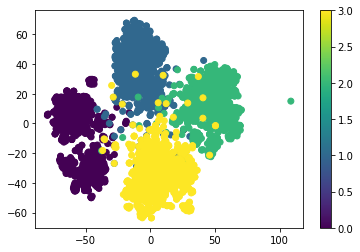

In [31]:
plt.scatter(emb[:, 0], emb[:, 1], c=true_labels)
plt.colorbar()
plt.show()

聚类类别图

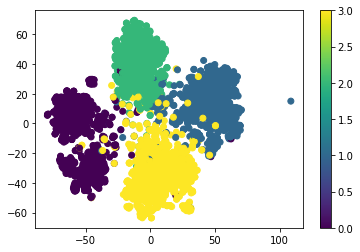

In [32]:
plt.scatter(emb[:, 0], emb[:, 1], c=model.labels_)
plt.colorbar()
plt.show()

## 未来的方案：使用深度学习技术
### 1.使用bert模型提取文本的特征向量
相关细节参考该链接：https://github.com/google-research/bert

这里只介绍下大致流程，如下：
* 下载预训练好的中文模型，链接：https://storage.googleapis.com/bert_models/2018_11_03/chinese_L-12_H-768_A-12.zip （需要科学上网才能下载）
* 下载bert库中的源码，地址：https://github.com/google-research/bert
* 在bert目录下运行命令：
```
python extract_features.py \
  --input_file=/tmp/input.txt \
  --output_file=/tmp/output.jsonl \
  --vocab_file=$BERT_BASE_DIR/vocab.txt \
  --bert_config_file=$BERT_BASE_DIR/bert_config.json \
  --init_checkpoint=$BERT_BASE_DIR/bert_model.ckpt \
  --layers=-1,-2,-3,-4 \
  --max_seq_length=128 \
  --batch_size=8
```

需要注意的是运行该脚本时无法根据屏幕上输出的信息找到对应的错误，本人踩过的一些坑如下：
* max_seq_length参数不能超过512
* input_file参数指定的文本文件中间不能存在空格（而windows系统支持文件命名中存在空格）

In [33]:
#财经, 教育, 体育, 游戏 对应的下标分别是0，5，10，12
target_indexs = [0, 5, 10, 12]
bert_feature_path = r'D:\textClassify\bert\data_features'
files = os.listdir(bert_feature_path)
features = []
for index in target_indexs:
    files_ = files[index*1000:(index+1)*1000]
    random.shuffle(files_)
    for file in files_[:30]:
        content = eval(open(os.path.join(bert_feature_path, file)).read().strip())
        feature = []
        for ele in content['features']:
            feature.extend(ele['layers'][0]['values'])
        features.append(feature)

通过补零操作让所有文本的特征维数一样，顺便生成标签列表

In [34]:
max_dims = 512 * 768
labels = []
for i, feature in enumerate(features):
    labels.append(i//30)
    while len(feature) < max_dims:
        feature.append(0)

In [35]:
start = time.time()
emb = TSNE(n_components=2).fit_transform(features)
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：6.244737386703491s


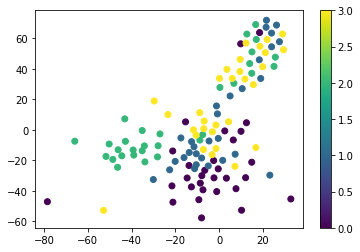

In [36]:
plt.scatter(emb[:, 0], emb[:, 1], c=labels)
plt.colorbar()
plt.show()

结果显示bert提取的特征不太好区分各个类别，对这个结果的分析如下：
* bert模型适合监督学习，因为之前bert模型在大多数NLP任务（监督学习任务）上都占据了榜单的第一名，用bert预训练模型提取的特征为基础，然后在自己的训练数据集上进行微调，已经被证明是非常有效的
* 如何将bert模型提取的特征用于无监督学习是个难点，bert模型输出的是文本中每个token的向量（768维），目前用的是直接拼接的方法，要想获得更加具备区分度的特征，可以考虑使用自编码器对其进行降维，自编码器需要使用到卷积模块（CNN）或循环模块（RNN）
* 最后需要说的是，尽管上述难点都解决了，使用bert进行自动化标签还是不太现实，因为bert模型太大，计算时间较长，生成14000条文本的特征耗时48个小时以上（GTX1660Ti显卡），且耗费存储空间，14000条文本的特征消耗100G的空间

### 2.使用自编码器技术提取文本特征
参考sequence to sequence的模型结构（如下图）
![image.png](https://pic2.zhimg.com/80/v2-7bcffd4c01f7073c0bd530563de831a5_hd.png)
* 不同于监督学习的是，这里的输出就是输入，即输入文本：“我是杨珉”，目标输出就是：“我是杨珉”
* 先在语料库上训练模型，然后将待获取特征的文本输入到模型中，模型中encoder的输出即该文本的特征向量

In [37]:
autoencoder_features_path = r'D:\textClassify\autoencoder\src\features_rnn.npy'
features_rnn = np.load(autoencoder_features_path)
features = []
for index in target_indexs:
    features.extend(features_rnn[index*1000:(index+1)*1000])

In [38]:
start = time.time()
emb = TSNE(n_components=2).fit_transform(features)
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：52.7278516292572s


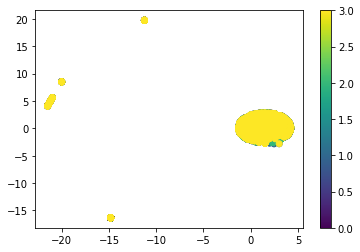

In [39]:
labels = []
for i, _ in enumerate(features):
    labels.append(i//1000)
plt.scatter(emb[:, 0], emb[:, 1], c=labels)
plt.colorbar()
plt.show()

结果显示提取的文本特征根本无法区分各个类别，要想获得具备区分度的文本特征，还需深入研究一下自编码器的相关技术，通过改进自编码器的网络结构来提升自动标签的准确率。

## 结论
初步研究结果表明使用词袋模型提取特征，然后使用tf-idf计算特征权重能获得最具备区分度的文本特征。而使用深度学习的两个方案（使用bert预训练模型提取文本特征和用自编码器提取文本特征）的初步结果并不理想，需要进一步的研究及改进。